In [1]:
import random
from random import randint
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
G= nx.erdos_renyi_graph(20,0.5)
nx.draw(G, with_labels=True)

D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [2]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)

In [3]:
deg = [val for (node, val) in G.degree()]
DEG=(sum(deg)/2)
print(DEG)
print(nx.info(G))

81.0
Name: 
Type: Graph
Number of nodes: 20
Number of edges: 81
Average degree:   8.1000


In [4]:
NU = G.number_of_nodes()

t=np.ones(NU)
t1=np.zeros(NU)
print(t)
print(t1)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Name: 
Type: Graph
Number of nodes: 19
Number of edges: 69
Average degree:   7.2632
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 19 69
Max betweeness centrality:  0.08836936483995307
Average betweenness centrality 0.03577571379428965
Average closeness centrality 0.6268446481898563
Max closeness centrality:  0.72
Average clustering 0.4205855547960811
Assortativity measures: 
 Coeff:  -0.1864406779661018
[2, 1, 12, 19, 14, 10, 5, 0, 11, 3, 18, 6, 17, 13, 9, 4, 16, 8, 7, 15]
[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Name: 
Type: Graph
Number of nodes: 18
Number of edges: 64
Average degree:   7.1111
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 18 64
Max betweeness centrality:  0.09851827094474153
Average betweenness centrality 0.037173202614379085
Average closeness centrality 0.6325630454222476
Max closeness centrality:  0.7391304347826086
Average clustering 0.408730158

D:\anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


ValueError: max() arg is an empty sequence

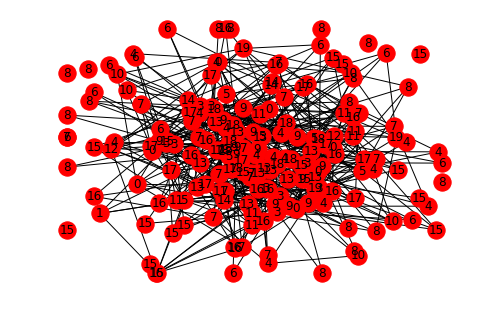

In [5]:
t2=[]
nt=np.ones(NU)
D=np.ones(NU)
GC1=np.ones(NU)
GC2=np.ones(NU)
GC3=np.ones(NU)
GC4=np.ones(NU)
GC5=np.ones(NU)
GC6=np.ones(NU)
GC7=np.ones(NU)
GC8=np.zeros(NU)
for i in range(100): 
          r=random.randint(0,NU-1)
          if r not in t2: t2.append(r)

for i in range (0,NU-1):
    t[t2[i]]=0
    print (t)
    Nt = G.number_of_nodes()
    nt[i]=Nt
    G.remove_node(t2[i])
    nx.draw(G, with_labels=True)
    deg = [val for (node, val) in G.degree()]
    DEG=(sum(deg)/2)
    D[i]=DEG
    print(nx.info(G))
    
    betweenness = nx.betweenness_centrality(G, normalized=True).values()
    closeness = nx.closeness_centrality(G).values()
    
    print("Number of isolated nodes: ", nx.number_of_isolates(G))

    if G.is_directed():
        calc_measure_dir(G)
    else:
        giant_component= sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
        print("Size of biggest GCC (nodes, edges):", giant_component[0].order(), giant_component[0].size())
        
    print("Max betweeness centrality: ", np.max(np.array(list(betweenness))))
    print("Average betweenness centrality", np.mean(np.array(list(betweenness))))
    print("Average closeness centrality", np.mean(np.array(list(closeness))))
    print("Max closeness centrality: ", np.max(np.array(list(closeness))))
    print("Average clustering", nx.average_clustering(G.to_undirected()))
    print("Assortativity measures: \n Coeff: ", nx.degree_assortativity_coefficient(G))
    print (t2)
    GC1[i]=giant_component[0].size()
    GC2[i]=giant_component[0].order() 
    GC3[i]=np.max(np.array(list(betweenness)))
    GC4[i]= np.mean(np.array(list(betweenness)))
    GC5[i]=np.mean(np.array(list(closeness)))
    GC6[i]=np.max(np.array(list(closeness)))
    GC7[i]=nx.average_clustering(G.to_undirected())
    GC8[i]=nx.degree_assortativity_coefficient(G)

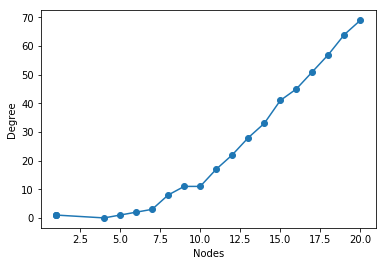

In [8]:
plt.plot(nt , D, '-o')
plt.ylabel('Degree')
plt.xlabel('Nodes')
plt.show()

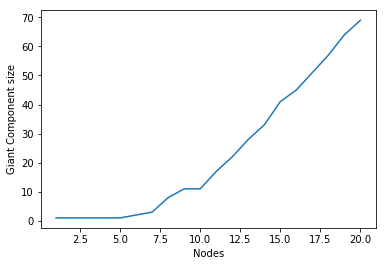

In [9]:
plt.plot(nt, GC1 )
plt.ylabel('Giant Component size')
plt.xlabel('Nodes')
plt.show()

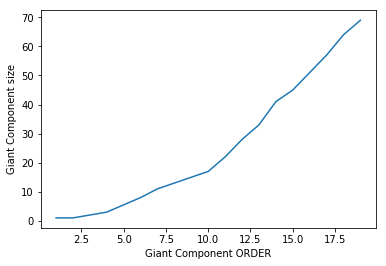

In [11]:
plt.plot(GC2, GC1 )
plt.ylabel('Giant Component size')
plt.xlabel('Giant Component ORDER')
plt.show()

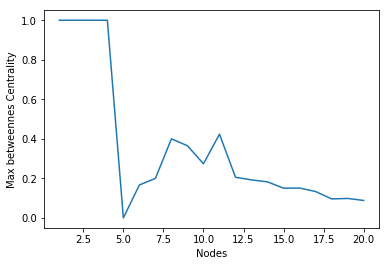

In [12]:
plt.plot(nt, GC3 )
plt.ylabel('Max betweennes Centrality')
plt.xlabel('Nodes')
plt.show()

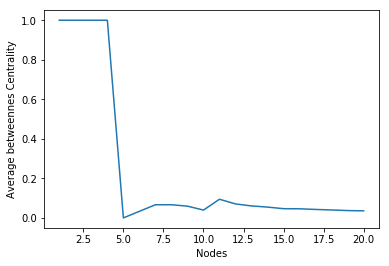

In [13]:
plt.plot(nt, GC4 )
plt.ylabel('Average betweennes Centrality')
plt.xlabel('Nodes')
plt.show()

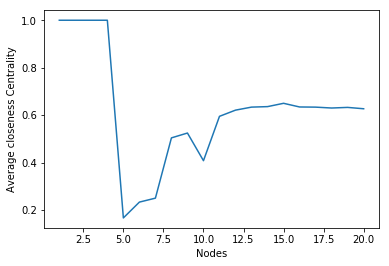

In [14]:
plt.plot(nt, GC5 )
plt.ylabel('Average closeness Centrality')
plt.xlabel('Nodes')
plt.show()

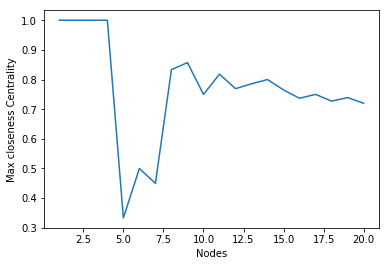

In [15]:
plt.plot(nt, GC6 )
plt.ylabel('Max closeness Centrality')
plt.xlabel('Nodes')
plt.show()

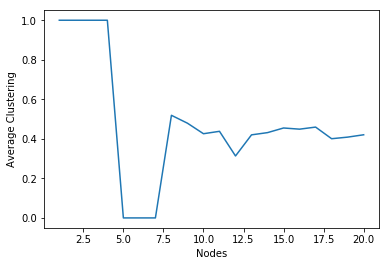

In [16]:
plt.plot(nt, GC7 )
plt.ylabel('Average Clustering')
plt.xlabel('Nodes')
plt.show()

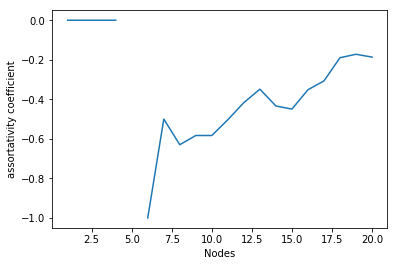

In [17]:
plt.plot(nt, GC8 )
plt.ylabel('assortativity coefficient')
plt.xlabel('Nodes')
plt.show()

No handles with labels found to put in legend.


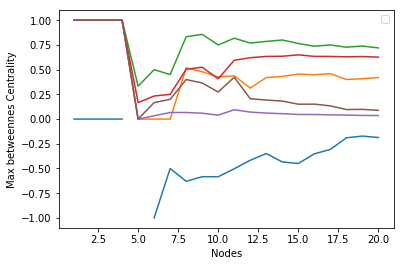

In [18]:
plt.plot(nt, GC8 )
plt.ylabel('assortativity coefficient')
plt.plot(nt, GC7 )
plt.ylabel('Average Clustering')
plt.xlabel('Nodes')
plt.plot(nt, GC6 )
plt.ylabel('Max closeness Centrality')
plt.plot(nt, GC5 )
plt.ylabel('Average closeness Centrality')
plt.plot(nt, GC4 )
plt.ylabel('Average betweennes Centrality')
plt.plot(nt, GC3 )
plt.ylabel('Max betweennes Centrality')
 
plt.legend()

0.0
Name: 
Type: Graph
Number of nodes: 5
Number of edges: 7
Average degree:   2.8000


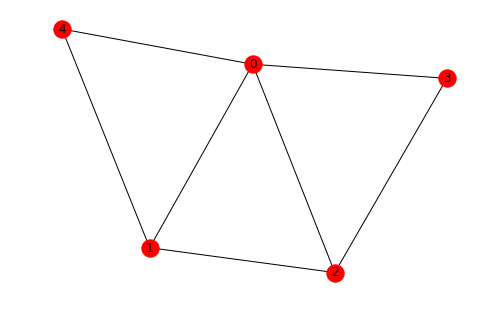

In [23]:
edgelist=[(0,1),(1,2),(2,3),(0,3),(2,0),(1,4),(4,0)] 
G1=nx.Graph(edgelist)
nx.draw(G1, with_labels=True)
DEG=(sum(deg)/2)
print(DEG)
print(nx.info(G1))


In [24]:
NU = G.number_of_nodes()

t=np.ones(NU)
t1=np.zeros(NU)
print(t)
print(t1)

[1. 1. 1.]
[0. 0. 0.]


[0. 1. 0.]
Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000
Number of isolated nodes:  0
Size of biggest GCC (nodes, edges): 4 4
Max betweeness centrality:  0.6666666666666666
Average betweenness centrality 0.16666666666666666
Average closeness centrality 0.775
Max closeness centrality:  1.0
Average clustering 0.5833333333333333
Assortativity measures: 
 Coeff:  -0.7142857142857143
[2, 0, 1]
[0. 1. 0.]
Name: 
Type: Graph
Number of nodes: 3
Number of edges: 1
Average degree:   0.6667
Number of isolated nodes:  1
Size of biggest GCC (nodes, edges): 2 1
Max betweeness centrality:  0.0
Average betweenness centrality 0.0
Average closeness centrality 0.3333333333333333
Max closeness centrality:  0.5
Average clustering 0.0
Assortativity measures: 
 Coeff:  nan
[2, 0, 1]


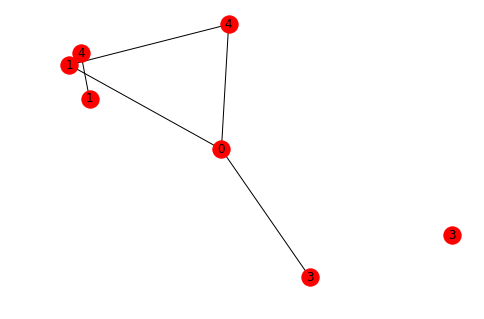

In [26]:
t2=[]
nt=np.ones(NU)
D=np.ones(NU)
GC1=np.ones(NU)
GC2=np.ones(NU)
GC3=np.ones(NU)
GC4=np.ones(NU)
GC5=np.ones(NU)
GC6=np.ones(NU)
GC7=np.ones(NU)
GC8=np.zeros(NU)
for i in range(100): 
          r=random.randint(0,NU-1)
          if r not in t2: t2.append(r)

for i in range (0,NU-1):
    t[t2[i]]=0
    print (t)
    Nt = G1.number_of_nodes()
    nt[i]=Nt
    G1.remove_node(t2[i])
    nx.draw(G1, with_labels=True)
    deg = [val for (node, val) in G1.degree()]
    DEG=(sum(deg)/2)
    D[i]=DEG
    print(nx.info(G1))
    
    betweenness = nx.betweenness_centrality(G1, normalized=True).values()
    closeness = nx.closeness_centrality(G1).values()
    
    print("Number of isolated nodes: ", nx.number_of_isolates(G1))

    if G1.is_directed():
        calc_measure_dir(G1)
    else:
        giant_component= sorted(nx.connected_component_subgraphs(G1), key = len, reverse=True)
        print("Size of biggest GCC (nodes, edges):", giant_component[0].order(), giant_component[0].size())
        
    print("Max betweeness centrality: ", np.max(np.array(list(betweenness))))
    print("Average betweenness centrality", np.mean(np.array(list(betweenness))))
    print("Average closeness centrality", np.mean(np.array(list(closeness))))
    print("Max closeness centrality: ", np.max(np.array(list(closeness))))
    print("Average clustering", nx.average_clustering(G1.to_undirected()))
    print("Assortativity measures: \n Coeff: ", nx.degree_assortativity_coefficient(G1))
    print (t2)
    GC1[i]=giant_component[0].size()
    GC2[i]=giant_component[0].order() 
    GC3[i]=np.max(np.array(list(betweenness)))
    GC4[i]= np.mean(np.array(list(betweenness)))
    GC5[i]=np.mean(np.array(list(closeness)))
    GC6[i]=np.max(np.array(list(closeness)))
    GC7[i]=nx.average_clustering(G1.to_undirected())
    GC8[i]=nx.degree_assortativity_coefficient(G1)

No handles with labels found to put in legend.


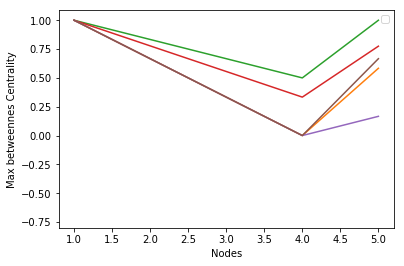

In [27]:
plt.plot(nt, GC8 )
plt.ylabel('assortativity coefficient')
plt.plot(nt, GC7 )
plt.ylabel('Average Clustering')
plt.xlabel('Nodes')
plt.plot(nt, GC6 )
plt.ylabel('Max closeness Centrality')
plt.plot(nt, GC5 )
plt.ylabel('Average closeness Centrality')
plt.plot(nt, GC4 )
plt.ylabel('Average betweennes Centrality')
plt.plot(nt, GC3 )
plt.ylabel('Max betweennes Centrality')
 
plt.legend()